In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import snow_degree_day 

In [10]:
cfg_file='topoflow/examples/Treynor_Iowa/June_20_67_snow_degree_day.cfg'
m=snow_degree_day.snow_component()

In [11]:
m.P_snow=0.02
m.rho_H2O=1000 # density of water kg/m3
m.T_air=10
m.initialize(cfg_file);

 
Snow component: Initializing...
Imported netCDF4 version: 1.1.9


array(0.0)

In [12]:
time = [m.get_current_time().copy()]
# NOTE: EMELI does not have get_value
vol_SM = [m.get_values('snowpack__domain_time_integral_of_melt_volume_flux').copy()]
h_snow = [m.get_values('snowpack__depth').copy()] 
h_swe = [m.get_values('snowpack__liquid-equivalent_depth').copy()]
SM = [m.get_values('snowpack__melt_volume_flux').copy()]
rho_snow = [m.get_values('snowpack__z_mean_of_mass-per-volume_density').copy()]

print vol_SM, m.get_current_time(), m.get_end_time()
while m.get_current_time() < m.get_end_time():
    print m.get_current_time(), m.get_end_time()
    m.update()
    time.append(m.get_current_time().copy())
    vol_SM.append(m.vol_SM.copy() )
    h_snow.append(m.h_snow.copy() )
    h_swe.append(m.h_swe.copy() )
    SM.append(m.SM.copy() )
    rho_snow.append(m.rho_snow.copy() )
    
print np.shape(vol_SM), np.shape(h_snow), np.shape(h_swe), np.shape(SM)

[array(0.0)] 0.0 36000.0
0.0 36000.0
3600.0 36000.0
7200.0 36000.0
10800.0 36000.0
14400.0 36000.0
18000.0 36000.0
21600.0 36000.0
25200.0 36000.0
28800.0 36000.0
32400.0 36000.0
(11,) (11,) (11,) (11,)


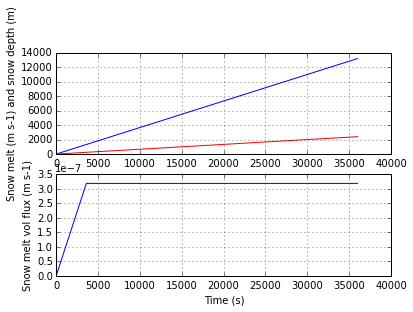

In [19]:
plt.subplot(211)
plt.plot(time,vol_SM,'b',time,h_snow,'r'); 
plt.ylabel('Snow melt (m s-1) and snow depth (m)')
plt.grid();
plt.subplot(212)
plt.plot(time,SM); 
plt.xlabel('Time (s)')
plt.ylabel('Snow melt vol flux (m s-1)')
plt.grid(); plt.show()

In [10]:
h_snow

[array(240.49617500000002),
 array(480.49235000000004),
 array(720.488525),
 array(960.4847),
 array(1200.480875),
 array(1440.47705),
 array(1680.473225),
 array(1920.4694),
 array(2160.465575),
 array(2400.46175)]